In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
import seaborn as sns
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix,precision_score,recall_score,f1_score,precision_recall_fscore_support
from datetime import datetime as dt
from datetime import timedelta

In [3]:
df_crowd = pd.read_csv('./ks-projects-201801.csv')
display(df_crowd.head())
display(df_crowd.describe())
display(df_crowd.info())
print(df_crowd.isnull().sum())
# goal=資金調達の目標、launched=発売日、pledged=出資金、backers=既に出資を決めた人数、usd~=米ドル換算、goal=目標金額、state=状態

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


None

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64


In [4]:
# 不必要と思われるデータを除外
df = df_crowd[['main_category','currency','deadline','goal','launched','state','backers','usd pledged','usd_pledged_real','usd_goal_real']]
print(df.isnull().sum())
print(df['state'].value_counts()) # underfined:未定義 suspended:一時停止

main_category          0
currency               0
deadline               0
goal                   0
launched               0
state                  0
backers                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64
failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64


In [5]:
df_f = df[df['state'] == 'failed']
df_s = df[df['state'] == 'successful']
df_fs =  df[(df['state'] == 'successful') | (df['state'] =='failed')]
# state=failed,successfulのみ表示
print(df_fs['state'].value_counts()) #除外出来ているか確認のため表示

failed        197719
successful    133956
Name: state, dtype: int64


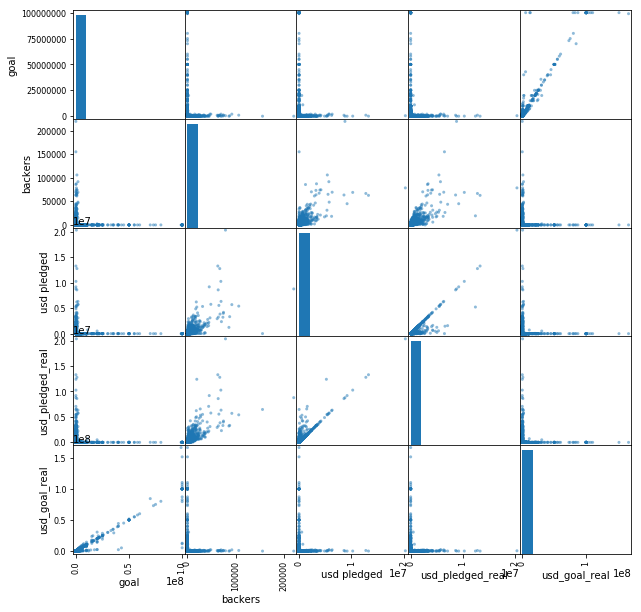

In [6]:
pd.plotting.scatter_matrix(df_fs,figsize=(10,10)) # 関係性の確認
plt.show()

,main_category,currency,deadline,launched,state,backers,usd_pledged_real,usd_goal_real
0,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,0.0,1533.95
1,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,2421.0,30000.00
2,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,220.0,45000.00
3,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,1.0,5000.00
5,Food,USD,2016-04-01,2016-02-26 13:38:27,successful,224,52375.0,50000.00


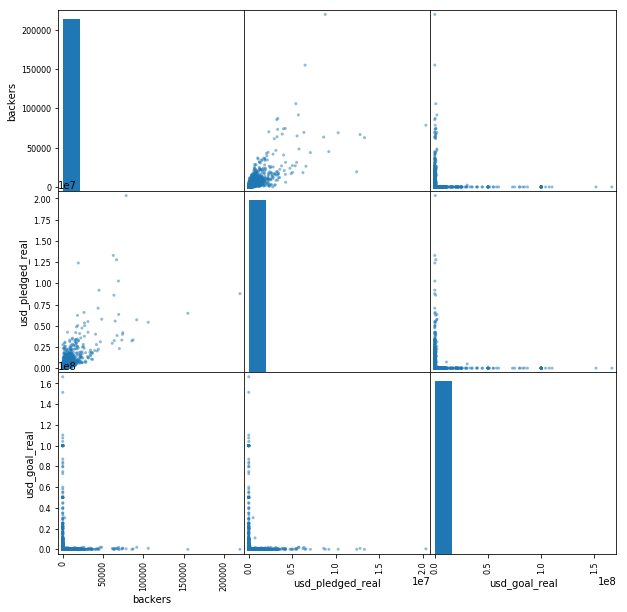

In [7]:
# 相関の高いものは統一
df_fs = df_fs[['main_category','currency','deadline','launched','state','backers','usd_pledged_real','usd_goal_real']]
# 除外されているか確認
display(df_fs.head())
pd.plotting.scatter_matrix(df_fs,figsize=(10,10))
plt.show()

In [8]:
#mein_categoryとcurrencyをランダム変数に置換
df_fs_dummy = pd.get_dummies(df_fs['main_category']) 
df_fs_dummy_c = pd.get_dummies(df_fs['currency'])
display(df_fs_dummy.head())
display(df_fs_dummy_c.head())

,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


,AUD,CAD,CHF,DKK,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [9]:
# main_categoryとcurrencyはダミー変数に変換したため、これも不必要として除外
df_c = df_fs.drop(['main_category','currency'],axis=1) 
df_c.head()

,deadline,launched,state,backers,usd_pledged_real,usd_goal_real
0,2015-10-09,2015-08-11 12:12:28,failed,0,0.0,1533.95
1,2017-11-01,2017-09-02 04:43:57,failed,15,2421.0,30000.00
2,2013-02-26,2013-01-12 00:20:50,failed,3,220.0,45000.00
3,2012-04-16,2012-03-17 03:24:11,failed,1,1.0,5000.00
5,2016-04-01,2016-02-26 13:38:27,successful,224,52375.0,50000.00


In [10]:
df_c['deadline'] = pd.to_datetime(df_c['deadline']) # 計算可能にするため、文字列⇒datetime型に変換

In [11]:
df_c['launched'] = pd.to_datetime(df_c['launched']) # 同上。なぜか一つにまとめると片側が変換されなかったため、別で実行

In [12]:
df_c.info() # 変換されているか確認

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331675 entries, 0 to 378660
Data columns (total 6 columns):
deadline            331675 non-null datetime64[ns]
launched            331675 non-null datetime64[ns]
state               331675 non-null object
backers             331675 non-null int64
usd_pledged_real    331675 non-null float64
usd_goal_real       331675 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(1), object(1)
memory usage: 17.7+ MB


In [13]:
df_c['day_left'] = df_c['deadline'] - df_c['launched'] # 残日数計算。計算結果はtimedelta型になる
df_c.head()

,deadline,launched,state,backers,usd_pledged_real,usd_goal_real,day_left
0,2015-10-09,2015-08-11 12:12:28,failed,0,0.0,1533.95,58 days 11:47:32
1,2017-11-01,2017-09-02 04:43:57,failed,15,2421.0,30000.00,59 days 19:16:03
2,2013-02-26,2013-01-12 00:20:50,failed,3,220.0,45000.00,44 days 23:39:10
3,2012-04-16,2012-03-17 03:24:11,failed,1,1.0,5000.00,29 days 20:35:49
5,2016-04-01,2016-02-26 13:38:27,successful,224,52375.0,50000.00,34 days 10:21:33


In [14]:
df_c['day_left'] = (df_c['day_left'] / timedelta(days=1)) # timedelta型を整数に変換
# 計算に使用した2列は不必要なため除外
df_c = df_c.drop(['deadline','launched'],axis=1)
# 見やすいよう並び替え
df_c = df_c.reindex(columns=['state','day_left','backers','usd_pledged_real','usd_goal_real'])
df_c.head()

,state,day_left,backers,usd_pledged_real,usd_goal_real
0,failed,58.491343,0,0.0,1533.95
1,failed,59.802813,15,2421.0,30000.00
2,failed,44.985532,3,220.0,45000.00
3,failed,29.858206,1,1.0,5000.00
5,successful,34.431632,224,52375.0,50000.00


In [15]:
# ２つのデータフレームを結合させる
df_c_a = pd.concat([df_c,df_fs_dummy],axis=1,join_axes=[df_c.index]) 
df_c_all = pd.concat([df_c_a,df_fs_dummy_c],axis=1,join_axes=[df_c_a.index])
# axis=1:列側にて結合。join_axesにdf_cのindexを指定しているのでdf_cのindexが残る
df_c_all.head()

,state,day_left,backers,usd_pledged_real,usd_goal_real,Art,Comics,Crafts,Dance,Design,...,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
0,failed,58.491343,0,0.0,1533.95,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,failed,59.802813,15,2421.0,30000.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,failed,44.985532,3,220.0,45000.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,failed,29.858206,1,1.0,5000.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,successful,34.431632,224,52375.0,50000.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
df_c_all['state'] = (df_c_all['state'] == 'successful') # successfulなら1、failedなら0
df_c_all['state'].value_counts()

False    197719
True     133956
Name: state, dtype: int64

In [17]:
df_c_all.head() # 変更されているか確認

,state,day_left,backers,usd_pledged_real,usd_goal_real,Art,Comics,Crafts,Dance,Design,...,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
0,False,58.491343,0,0.0,1533.95,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,False,59.802813,15,2421.0,30000.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,False,44.985532,3,220.0,45000.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,False,29.858206,1,1.0,5000.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,True,34.431632,224,52375.0,50000.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
y = df_c_all['state'].values
X = df_c_all.drop('state',axis=1).values
clf = SGDClassifier(loss='log',penalty='none',max_iter=1000,fit_intercept=True,random_state=1234,tol=1e-3)
clf.fit(X,y)

w0 = clf.intercept_[0]
w1 = clf.coef_[0,0]
w2 = clf.coef_[0,1]
print('w0 = {:.3f},w1 = {:.3f},w2 = {:.3f}'.format(w0,w1,w2))

w0 = 8.777,w1 = 1.591,w2 = 766.116


In [19]:
y_est = clf.predict(X)

conf_mat = pd.DataFrame(confusion_matrix(y_est,y),
                       index=['正解 = 達成','正解 = 未達成'],
                       columns=['予測 = 達成','予測 = 未達成'])
display(conf_mat)

print('対数尤度 = {:.3f}'.format(-log_loss(y,y_est)))

accuracy = accuracy_score(y,y_est)
precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_est)

print('正答率 = {:.3f}%'.format(100 * accuracy))
print('適合率 = {:.3f}%'.format(100 * precision[0]))
print('再現率 = {:.3f}%'.format(100 * recall[0]))
print('F1値 = {:.3f}'.format(100 * f1_score[0]))

,予測 = 達成,予測 = 未達成
正解 = 達成,197712,3
正解 = 未達成,7,133953


対数尤度 = -0.001
正答率 = 99.997%
適合率 = 99.998%
再現率 = 99.996%
F1値 = 99.997


In [29]:
# ここより下は、散布図の関係が縦・横になってしまっているので解消しようと思い、対数に変換し表示しようとしましたがうまくいきませんでした。

usd_goal_log = np.log(df_c_all['usd_goal_real'])
usd_pledged_log = np.log(df_c_all['usd_pledged_real'])
backers_log = np.log(df_c_all['backers'])


C:\Users\t104950\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\t104950\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [30]:
usd_pledged_log = usd_pledged_log.replace(-np.inf,'')

In [31]:
backers_log = backers_log.replace(-np.inf,'')

In [37]:
print(len(usd_goal_log))
print(len(usd_pledged_log))
print(len(backers_log))

331675
331675
331675


TypeError: 7.791935956938058 is not a string

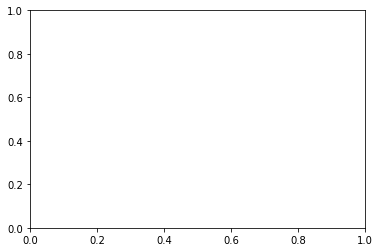

In [39]:
plt.scatter(usd_goal_log,usd_pledged_log,bins=100)